In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os

def load_scores(experiment):
    with open(os.path.join(experiment, "run.log")) as log_f:
        groups = {}
        group = {}
        step = 0
        for line in log_f:
            if " [step] " in line:
                groups[step] = group
                group = {}
                step = int(line.split()[-1])
            elif " [task] " in line:
                parts = line.split()
                task = parts[4]
                score = float(parts[6])
                assert task not in group
                group[task] = score
        return groups
    
def plot_means(experiments, n_tasks):
    max_step = 3000000
    for experiment, style in experiments.items():
        label, color, ls = style
        steps = []
        means = []
        scores = load_scores(experiment)
        for step in sorted(scores.keys()):
            if step > max_step:
                break
            block = scores[step]
            mean = sum(block.values()) / n_tasks
            steps.append(step)
            means.append(mean)
        plt.plot(steps, means, label=label, color=color, ls=ls)
    plt.legend(loc=2)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ylim([0, 1])
    plt.show()

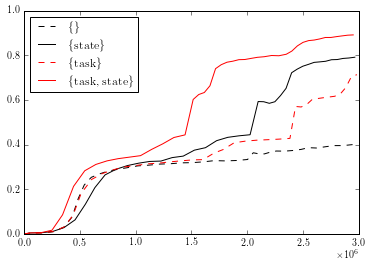

In [51]:
plot_means(
    {"craft_modular_common-nostate-baseline": ("\{\}", "k", "--"),
     "craft_modular_common-baseline": ("\{state\}", "k", "-"), 
     "craft_modular_task-baseline": ("\{task\}", "r", "--"),
     "craft_modular_state-baseline": ("\{task, state\}", "r", "-")},
    10)

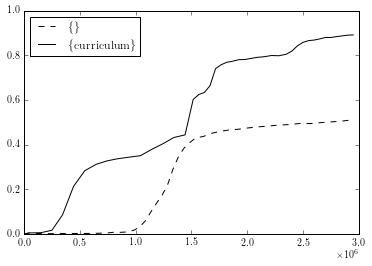

In [53]:
plot_means(
    {"craft_modular_no-curriculum": ("\{\}", "k", "--"),
     "craft_modular_state-baseline": ("\{curriculum\}", "k", "-")},
    10)